## Data Preprocessing

In [ ]:
# Multiple Linear Regression

# 1.Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns



# 2.Importing the dataset
dataset1 = pd.read_csv('C:/Tejinder/SDS/Student Performance Analysis/student+performance/student/student-mat.csv', sep=';', header=0)  # Header is in the first row
# dataset2 = pd.read_csv('C:/Tejinder/student-por.csv', sep=';', header=0)  # Header is in the first row
print(dataset1.head())
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values
# print(X) 
# print(dataset1.columns)
# Count the number of rows
# row_count = dataset1.shape[0]  # Number of rows
#print(f"Number of rows: {row_count}")
#dataset1.to_csv('C:/Tejinder/SDS/Student Performance Analysis/student+performance/student/output.csv', index=False)

# 3.Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Features to encode

###########################################################################################################


# 1. Define categorical and numerical features
categorical_features_indices = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]

# 2. Initialize ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features_indices)], remainder='passthrough')

# 3. Fit and transform the dataset
X = np.array(ct.fit_transform(X))
print(X)



[[1.0 0.0 1.0 ... 6 5 6]
 [1.0 0.0 1.0 ... 4 5 5]
 [1.0 0.0 1.0 ... 10 7 8]
 ...
 [0.0 1.0 0.0 ... 3 10 8]
 [0.0 1.0 0.0 ... 0 11 12]
 [0.0 1.0 0.0 ... 5 8 9]]


In [34]:
##############################################################################################################
# 4. Combine X and y into a DataFrame
# Ensure column names for encoded variables and non-encoded variables are clear
encoded_column_names = [f"X_{i}" for i in range(X.shape[1])]  # Placeholder names for encoded X
correlation_df = pd.DataFrame(X, columns=encoded_column_names)
correlation_df['y'] = y  # Add y to the DataFrame
print(correlation_df)

     X_0  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  ... X_49 X_50 X_51  \
0    1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  ...    4    3    4   
1    1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...    5    3    3   
2    1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...    4    3    2   
3    1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...    3    2    2   
4    1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  ...    4    3    2   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
390  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  ...    5    5    4   
391  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...    2    4    5   
392  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  ...    5    5    3   
393  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  ...    4    4    1   
394  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  ...    3    2    3   

    X_52 X_53 X_54 X_55 X_56 X_57   y  
0      1    1    3    6    5    6  

In [37]:
# Calculate correlation of each X with Y
correlation_matrix = correlation_df.corr()  # Entire correlation matrix
correlation_with_Y = correlation_matrix[correlation_df].drop(correlation_df)  # Correlation of Xs with Y
# 5. Compute correlation matrix
correlation_matrix = correlation_df.corr()
print(correlation_matrix)



           X_0       X_1       X_2       X_3       X_4       X_5       X_6  \
X_0   1.000000 -1.000000 -0.012286  0.012286 -0.279797  0.279797  0.064866   
X_1  -1.000000  1.000000  0.012286 -0.012286  0.279797 -0.279797 -0.064866   
X_2  -0.012286  0.012286  1.000000 -1.000000 -0.028504  0.028504  0.089862   
X_3   0.012286 -0.012286 -1.000000  1.000000  0.028504 -0.028504 -0.089862   
X_4  -0.279797  0.279797 -0.028504  0.028504  1.000000 -1.000000  0.072472   
X_5   0.279797 -0.279797  0.028504 -0.028504 -1.000000  1.000000 -0.072472   
X_6   0.064866 -0.064866  0.089862 -0.089862  0.072472 -0.072472  1.000000   
X_7  -0.064866  0.064866 -0.089862  0.089862 -0.072472  0.072472 -1.000000   
X_8   0.045923 -0.045923  0.023443 -0.023443 -0.042572  0.042572 -0.149612   
X_9  -0.045923  0.045923 -0.023443  0.023443  0.042572 -0.042572  0.149612   
X_10 -0.069284  0.069284  0.155501 -0.155501  0.151152 -0.151152  0.031786   
X_11  0.055139 -0.055139  0.019817 -0.019817 -0.099233  0.099233

In [38]:
# Save processed data for further analysis
correlation_matrix.to_csv('Correlation_Matrix.csv', index=False)

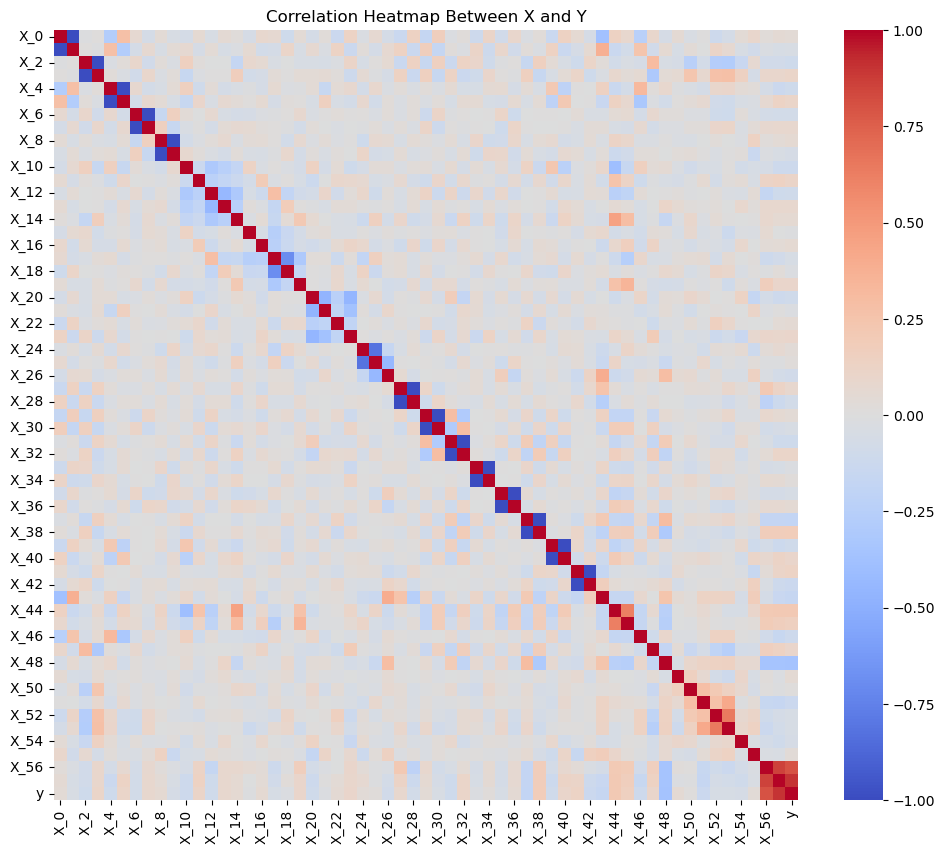

In [36]:
# 6. Visualize heatmap
plt.figure(figsize=(12, 10))  # Adjust size for better readability
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap Between X and Y")
plt.show()

Text(0.5, 1.0, 'Correlation plot for Math grading')

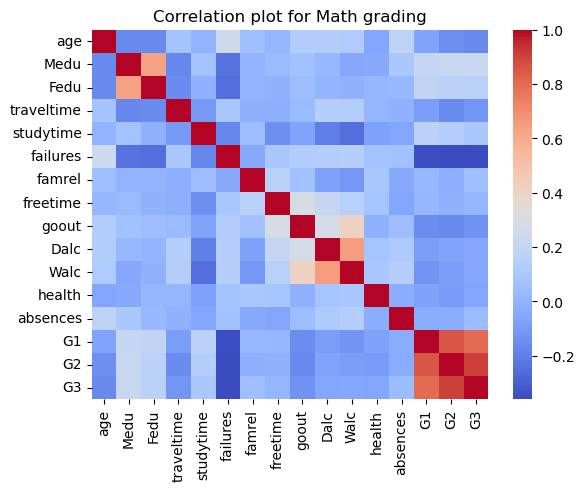

In [40]:
int_cols = dataset1.select_dtypes(include=[np.int64])

# select only the numeric columns
corr_matrix = int_cols.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation plot for Math grading")

## Univariate Analysis

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(dataset1.info())

print("\nFirst 5 Rows of Data:")
print(dataset1.head())

print("\nSummary Statistics:")
print(dataset1.describe())

print("\nCheck for Missing Values:")
print(dataset1.isnull().sum())

In [ ]:

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(dataset1.duplicated().sum())

# Visualize missing values (optional)
sns.heatmap(dataset1.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



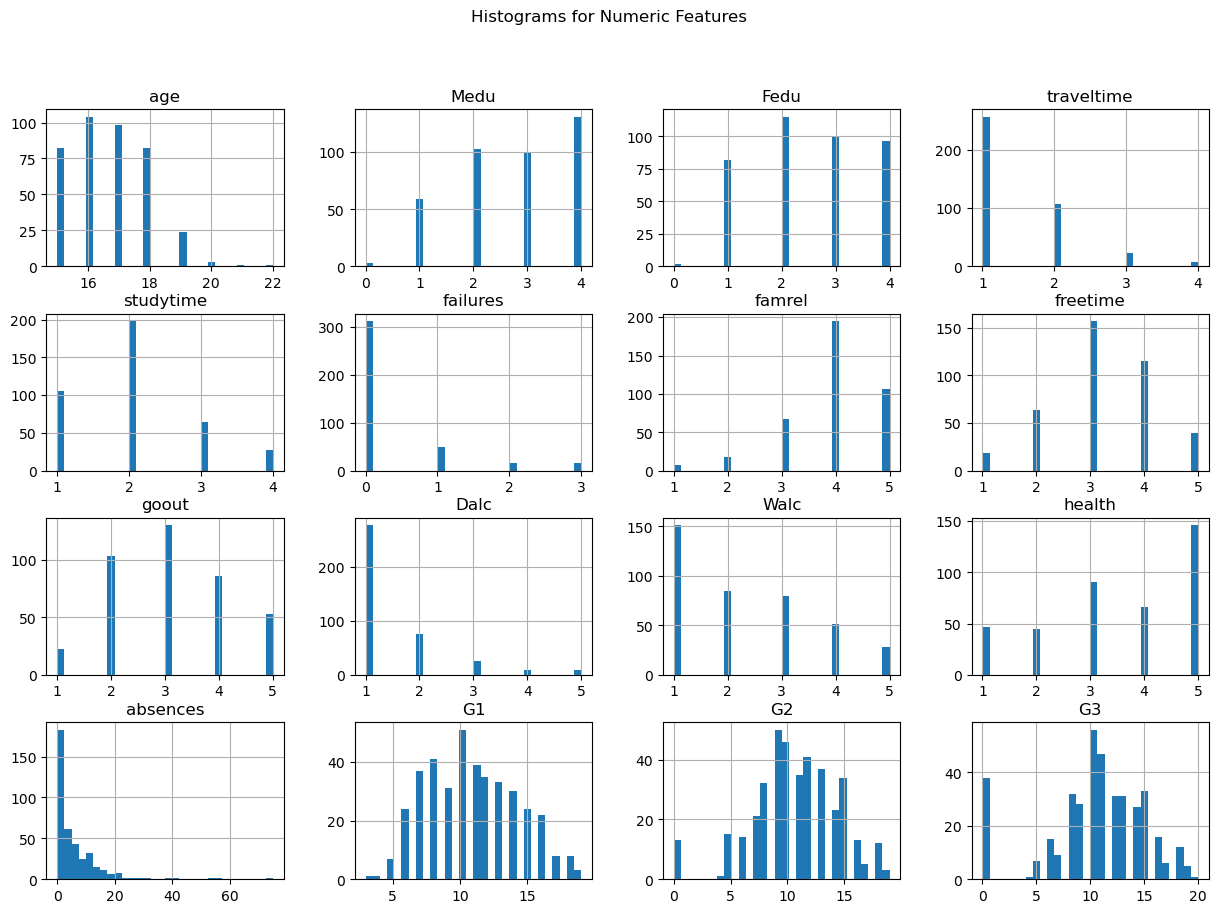

In [42]:
# Univariate Analysis
# Distribution of numerical features
dataset1.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms for Numeric Features")
plt.show()








In [ ]:
# Box plots for detecting outliers in numerical features
for column in dataset1.select_dtypes(include=np.number).columns:
    sns.boxplot(dataset1[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [ ]:
# Count plots for categorical features
for column in dataset1.select_dtypes(include='object').columns:
    sns.countplot(y=dataset1[column], order=dataset1[column].value_counts().index)
    plt.title(f"Countplot for {column}")
    plt.show()

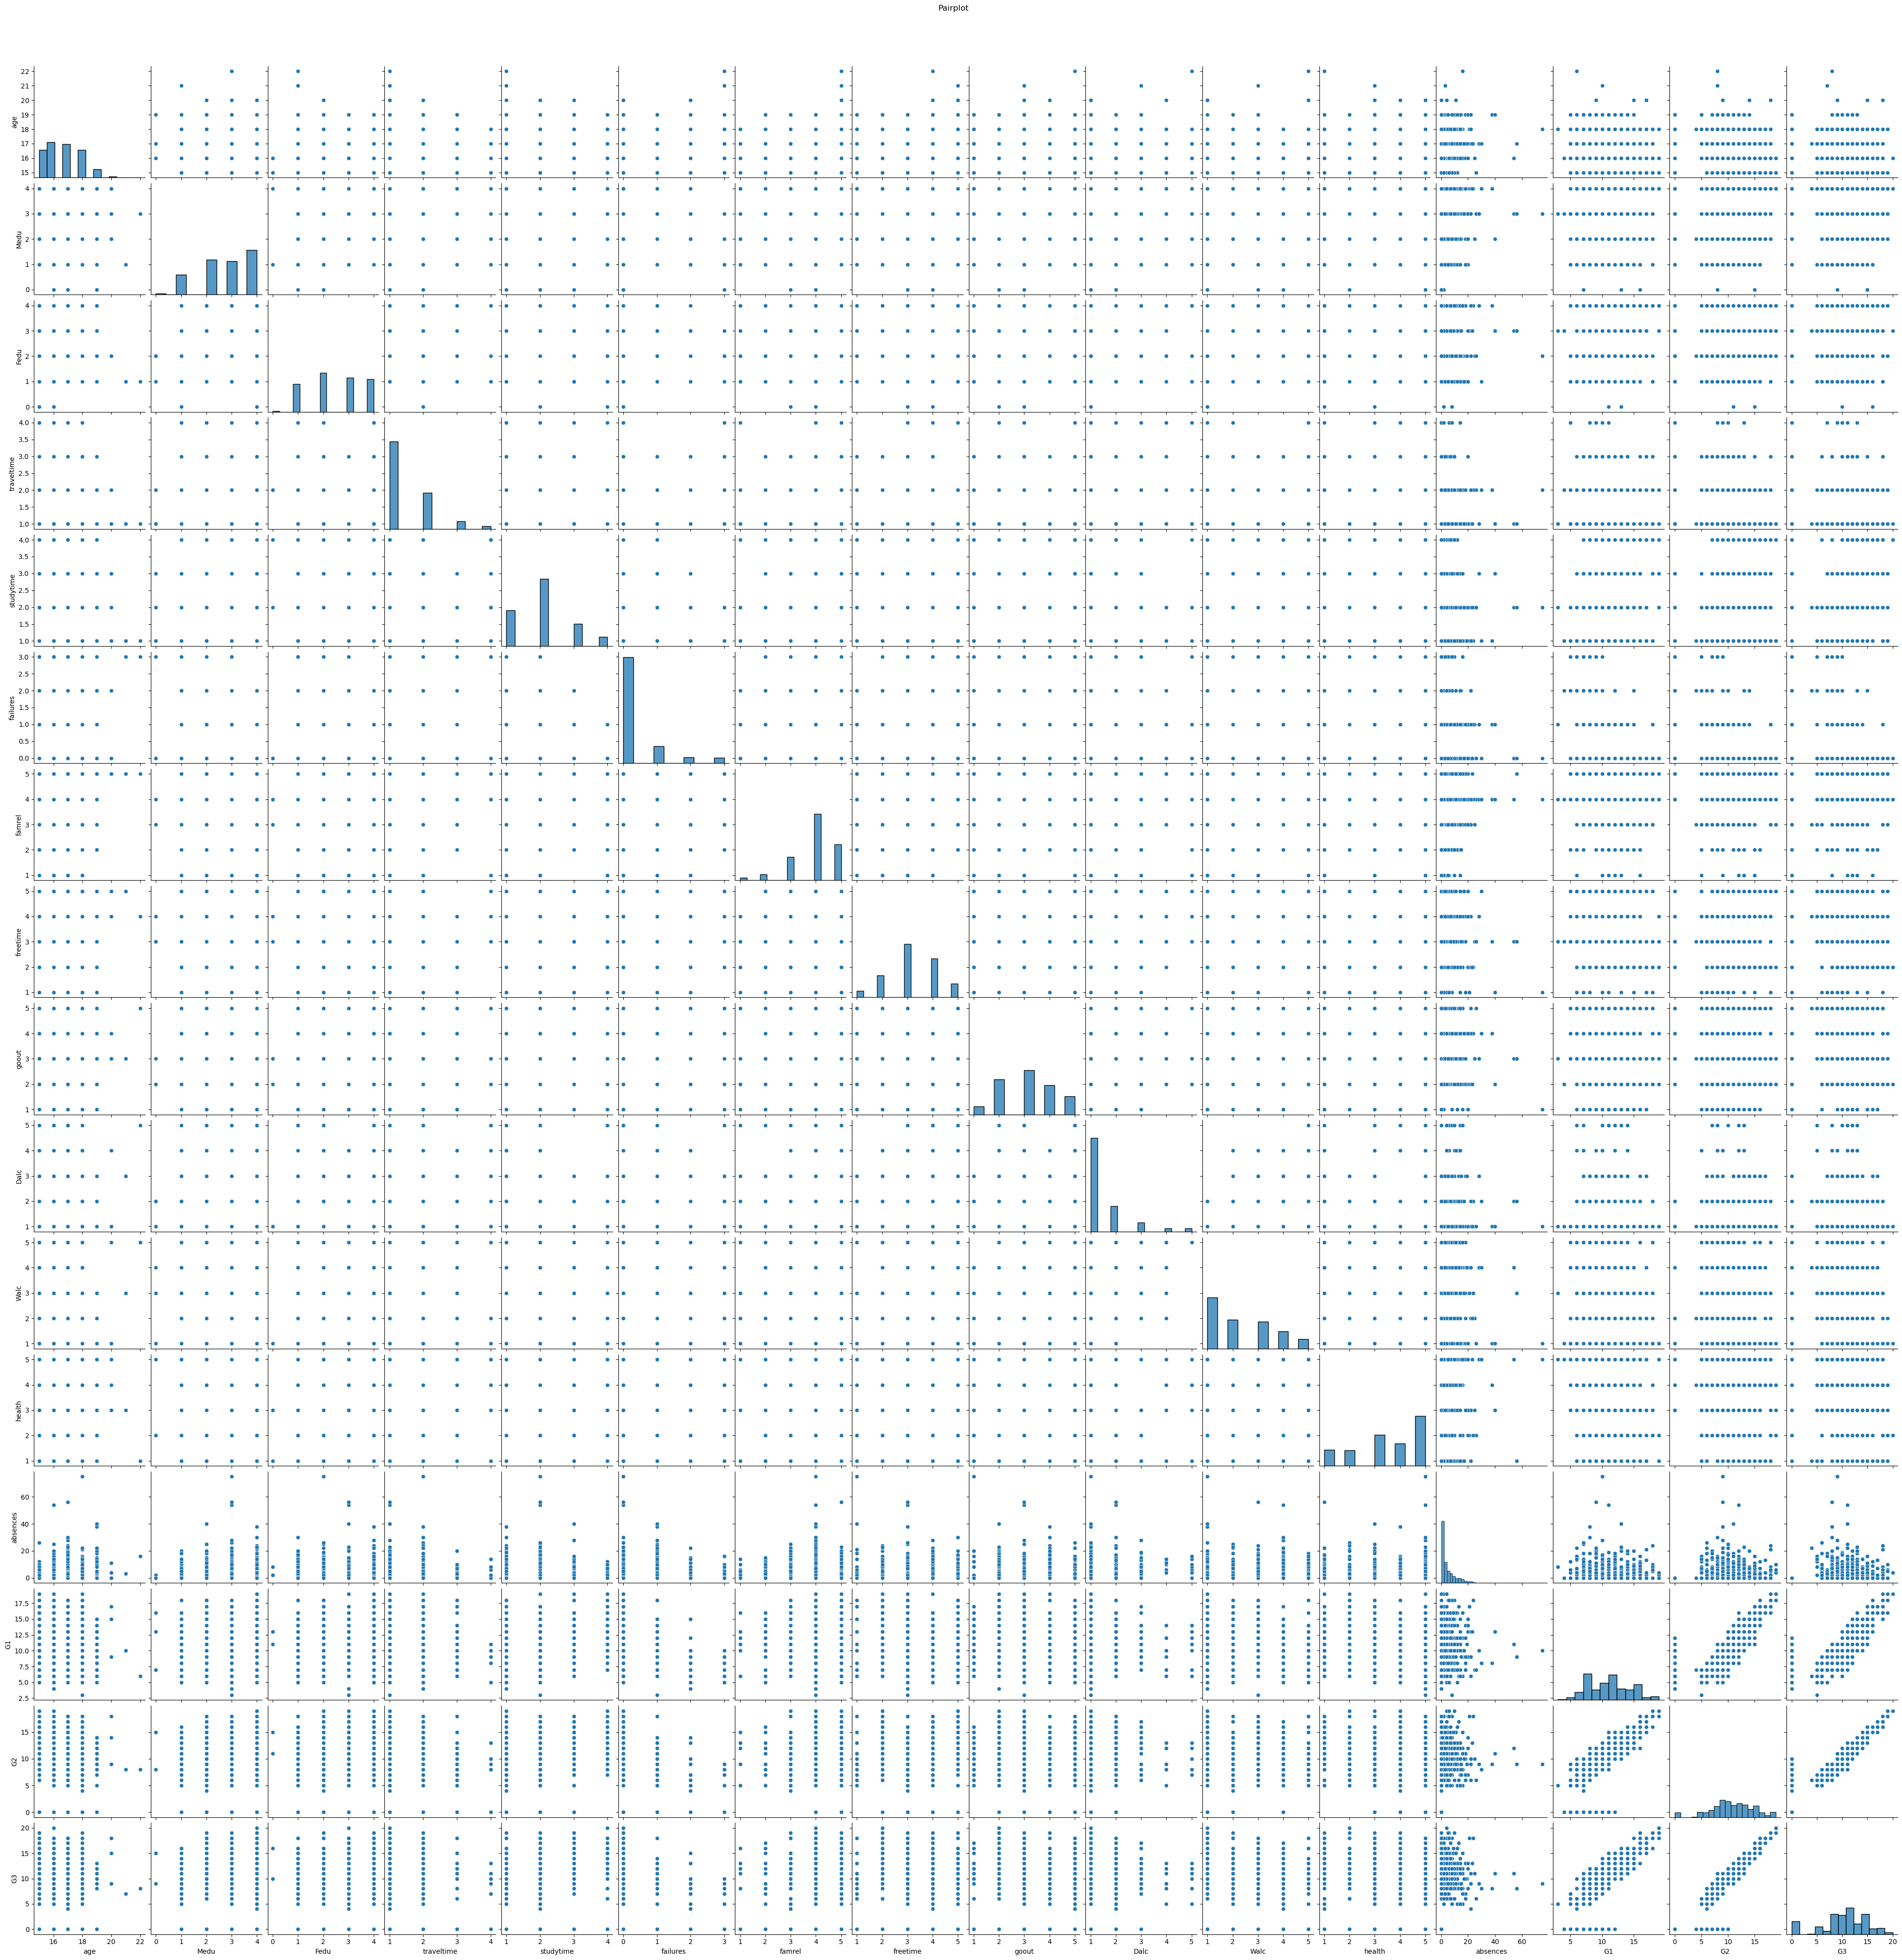

In [41]:
# Pair plot for visualizing relationships between numerical features
sns.pairplot(dataset1)
plt.suptitle("Pairplot", y=1.02)
plt.show()


In [1]:
# Categorical vs Numeric Analysis
categorical_columns = dataset1.select_dtypes(include='object').columns
numeric_columns = dataset1.select_dtypes(include=np.number).columns

for cat_col in categorical_columns:
    for num_col in numeric_columns:
        sns.boxplot(x=dataset1[cat_col], y=dataset1[num_col])
        plt.title(f"{num_col} by {cat_col}")
        plt.show()

NameError: name 'dataset1' is not defined

In [ ]:
# Calculate correlation of each X with Y
correlation_matrix = correlation_df.corr()  # Entire correlation matrix
correlation_with_Y = correlation_matrix[correlation_df].drop(correlation_df)  # Correlation of Xs with Y
# 5. Compute correlation matrix
correlation_matrix = correlation_df.corr()

In [18]:


# Save processed data for further analysis
dataset1.to_csv('processed_data.csv', index=False)